<a href="https://colab.research.google.com/github/YooJin919/2022S-ML/blob/main/HW3_201920722_%EC%9C%A0%EC%A7%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HW3 :: Parameter Tuning and Classifcation**

## 코랩과 구글 드라이브 연동 OR 로컬에서 파일 업로드
- 해당 섹션 코드 수정 가능

In [1]:
# 연동 OR 파일 업로드
# 연동 시 path 설정 주의

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 불러오기

In [3]:
import numpy as np
import pandas as pd

In [4]:
#path = 'heart_clean.csv' # 제공된 csv 파일 사용
path = '/content/drive/MyDrive/Colab Notebooks/heart_clean.csv'
df = pd.read_csv(path)

In [5]:
df.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
0,53,120,0,0,0.0,0
1,65,134,0,1,1.1,1
2,60,160,0,1,0.5,1
3,57,150,1,0,0.2,0
4,57,150,0,1,0.6,1


## 데이터 나누기

### **주의 사항**
train_test_split에 random seed를 사용하여 split set을 고정한다.
- 모든 문제에 같은 random seed를 부여할 필요는 없다.


In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

print("X_train's shape : ", X_train.shape)
print("y_train's shape : ", y_train.shape)
print("\nX_val's shape : ", X_val.shape)
print("y_val's shape : ", y_val.shape)
print("\nX_test's shape : ", X_test.shape)
print("y_test's shape : ", y_test.shape)

X_train's shape :  (568, 5)
y_train's shape :  (568,)

X_val's shape :  (71, 5)
y_val's shape :  (71,)

X_test's shape :  (71, 5)
y_test's shape :  (71,)




---



## 문제1 KNN



- Scikit-learn 라이브러리를 이용하여 KNN의 최적의 파라미터를 찾는다.
    - 최근접 이웃을 찾기 위한 거리의 종류로 최소한 두 가지 이상의 거리 척도를 사용한다.
    - K값을 최소 3개 이상 비교한다.
    - 거리 척도, k값에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 k값, y축 정확도)
    - 찾은 최적의 파라미터와 test set 이용하여 test_accuracy 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.



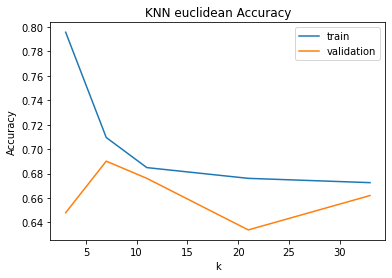

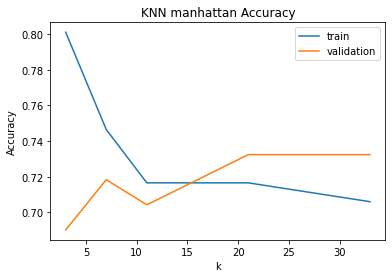

test accuracy: 0.7183098591549296 
k: 6 
metric: manhattan


In [7]:
### 문제 1 ###
## 코드 작성 ##

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k_value = [3, 7, 11, 21, 33]
eucli_train_accuracy = []
eucli_vali_accuracy = []
manha_train_accuracy = []
manha_vali_accuracy = []
k = 0 # 최적의 parameter값
k_metric = "" # 최적의 parameter를 가지는 거리 척도
accuracy = 0 # test_accuracy

# Euclidean Distance
for k in k_value:
  classifier = KNeighborsClassifier(n_neighbors = k, metric='euclidean') # k값 정하기
  classifier.fit(X_train, y_train) # training data 학습
  eucli_train_accuracy.append(classifier.score(X_train, y_train)) # 정확도 평가
  eucli_vali_accuracy.append(classifier.score(X_val, y_val)) # 정확도 평가

# Manhattan Distance
for k in k_value:
  classifier = KNeighborsClassifier(n_neighbors = k, metric='manhattan') # k값 정하기
  classifier.fit(X_train, y_train) # training data 학습
  manha_train_accuracy.append(classifier.score(X_train, y_train)) # 정확도 평가
  manha_vali_accuracy.append(classifier.score(X_val, y_val)) # 정확도 평가
  
# 그래프 그리기
plt.plot(k_value, eucli_train_accuracy, label='train')
plt.plot(k_value, eucli_vali_accuracy, label='validation')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN euclidean Accuracy")
plt.legend()
plt.show()

plt.plot(k_value, manha_train_accuracy, label='train')
plt.plot(k_value, manha_vali_accuracy, label='validation')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN manhattan Accuracy")
plt.legend()
plt.show()

## Validation Accuracy 값이 최대인 k값 찾기 => Validation을 가지고 Model 선정함
# index는 0부터 시작하고, k값은 3부터 시작하기 때문에 k의 index값에 3을 더해야 실제 k값이 된다.
# Euclidean 
eucli_max = max(eucli_vali_accuracy) # Accuracy 최대값
eucli_k = eucli_vali_accuracy.index(eucli_max) # 최대 Accuracy를 가지는 k값
eucli_k = eucli_k +3 

# Manhattan 
manha_max = max(manha_vali_accuracy) # Accuracy 최대값
manha_k = manha_vali_accuracy.index(manha_max) # 최대 Accuracy를 가지는 k값
manha_k = manha_k + 3

# print(eucli_max, eucli_k)
# print(manha_max, manha_k)

# Euclidean과 Manhattan의 Accuracy 중에서 더 큰 값으로 최적의 parameter 설정
if(eucli_max > manha_max):
  k = eucli_k
  k_metric = "euclidean"
else:
  k = manha_k
  k_metric = "manhattan"

# 최적의 parameter값, test data를 이용하여 test accuracy 계산하기
classifier = KNeighborsClassifier(n_neighbors = k, metric=k_metric) # k값 정하기
classifier.fit(X_train, y_train) # training data 학습
accuracy = classifier.score(X_test, y_test) # 정확도 평가

print("test accuracy:",accuracy,"\nk:",k,"\nmetric:",k_metric)

**설명 작성**  
- 최적의 파라미터: 새로 실행 할 때마다 값이 바뀐다. 설명 작성을 할 때의 최적의 파라미터는 다음과 같다.  
test accuracy : 0.7183098591549296 / k : 6 / metric : manhattan  
  
- 설명:  
3~15 사이의 모든 값을 한 번씩 k값으로 지정하고 euclidean distance, manhattan distance 두 가지 방법으로 distance를 결정한다.  
euclidean에서 train, validation dataset의 accuracy를 계산하고, manhattan 방법에서 train, validation dataset의 accurarcy를 계산한다.  
두 가지 방법중에서 validation accuracy가 가장 큰 k의 값을 최적의 k값으로 지정한다.  
최종적으로 결정된 k값과 distance 계산 방법을 가지고 test dataset을 계산하여 test accuracy를 구한다.



---



## 문제2 SVM


- Scikit-learn 라이브러리를 이용하여 SVM의 최적의 파라미터를 찾는다.
    - Kernel trick 중 최소 두개를 비교한다.
    - 최적의 파라미터 C값을 찾는다.
    - 파라미터에 따라 train, validation 정확도를 한 그래프로 그린다.(x축 C값, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.


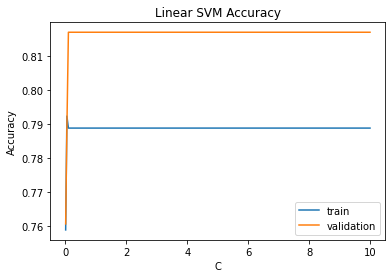

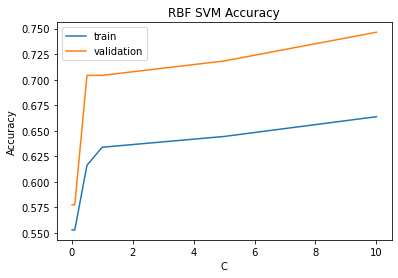

test accuracy: 0.8169014084507042 
C: 0.1 
kernel: linear


In [8]:
### 문제 2 ###
## 코드 작성 ##
from sklearn import svm  

# linear / rbf
c_value = [0.01, 0.05, 0.1, 0.5, 1, 5, 10]
linear_train_acc = []
linear_vali_acc = []
rbf_train_acc = []
rbf_vali_acc = []
Kernel = ""
margin = 0
accuracy = 0

# linear
for margin in c_value:
  classifier = svm.SVC(kernel='linear', C = margin) # SVM Classifier 만들기
  classifier.fit(X_train, y_train) # training data로 모델 학습시키기
  linear_train_acc.append(classifier.score(X_train, y_train)) # train 정확도 평가
  linear_vali_acc.append(classifier.score(X_val, y_val)) # validataion 정확도 평가

# RBF
for margin in c_value:
  classifier = svm.SVC(kernel='rbf', C = margin) # SVM Classifier 만들기
  classifier.fit(X_train, y_train) # training data로 모델 학습시키기
  rbf_train_acc.append(classifier.score(X_train, y_train)) # train 정확도 평가
  rbf_vali_acc.append(classifier.score(X_val, y_val)) # validataion 정확도 평가

# 그래프 그리기
plt.plot(c_value, linear_train_acc, label='train')
plt.plot(c_value, linear_vali_acc, label='validation')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("Linear SVM Accuracy")
plt.legend()
plt.show()

plt.plot(c_value, rbf_train_acc, label='train')
plt.plot(c_value, rbf_vali_acc, label='validation')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.title("RBF SVM Accuracy")
plt.legend()
plt.show()

## Validation Accuracy 값이 최대인 C값 찾기
linear_max = max(linear_vali_acc)
linear_index = linear_vali_acc.index(linear_max)
linear_index = c_value[linear_index]

rbf_max = max(rbf_vali_acc)
rbf_index = rbf_vali_acc.index(rbf_max)
rbf_index = c_value[rbf_index]

# print(linear_max, linear_index, rbf_max, rbf_index)

# Linear와 RBF의 Accuracy 중에서 더 큰 값으로 최적의 parameter 설정
if(linear_max > rbf_max):
  margin = linear_index
  Kernel = "linear"
else:
  margin = rbf_index
  Kernel = "rbf"


# 최적의 parameter값, test data를 이용하여 test accuracy 계산하기
classifier = svm.SVC(kernel=Kernel, C = margin) # k값 정하기
classifier.fit(X_train, y_train) # training data로 모델 학습시키기
accuracy = classifier.score(X_test, y_test) # 정확도 평가

print("test accuracy:",accuracy,"\nC:",margin,"\nkernel:",Kernel)

**설명 작성**  
- 최적의 파라미터: 새로 실행 할 때마다 값이 바뀐다. 설명 작성을 할 때의 최적의 파라미터는 다음과 같다.  
test accuracy : 0.8169014084507042 / C : 0.1 / metric : linear  
  
- 설명:  
[0.01, 0.05, 0.1, 0.5, 1, 5, 10]값을 한 번씩 C값으로 지정하고 Kernel을 linear, RBF 두 가지 방법으로 지정한다.  
linear에서 train, validation dataset의 accuracy를 계산하고, RBF에서 train, validation dataset의 accurarcy를 계산한다.  
두 가지 방법중에서 validation accuracy가 가장 큰 C의 값을 최적의 C값으로 지정한다.  
최종적으로 결정된 C값과 Kernel을 가지고 test dataset을 계산하여 test accuracy를 구한다.



---



## 문제3 Cross validation with Random Forest
### 3-1: k-fold
- 수업시간에 배운 **5-fold** 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
    - **5-fold CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
    - 파라미터에 따라 K-fold CV를 통해 나온 평균 정확도와 각 fold의 정확도들을 한 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
    - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
    - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

### 3-2: Leave One Out
- 수업시간에 배운 Leave-One-Out 를 이용하여 최적의 파라미터를 찾는다. (데이터는 동일)
- 수업시간에 배운 random forest 모델의 파라미터를 cross-validation을 바탕으로 최적화한다.
  - **Leave-One-Out CV를 할 때, test data를 제외한 90%의 데이터를 사용해야한다.**
  - 파라미터에 따라 Leave-One-Out CV를 통해 나온 평균 정확도를 그래프로 그린다.(x축 선택한 파라미터, y축 정확도)
  - 찾은 최적의 파라미터와 test set을 이용하여 test accuracy를 계산하고 기입한다.
  - 최적의 파라미터를 찾은 것에 대한 설명을 '텍스트 셀'에 작성한다.

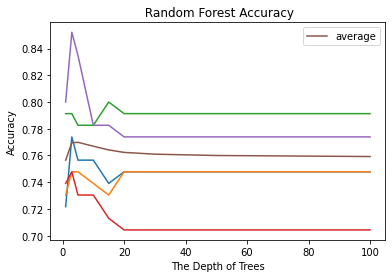

test accuracy = 0.78125 with max_depth = 5


In [9]:
### 문제 3-1 ###
## 코드 작성 ##

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


###### hyper-parameter : tree's max_depth ######

# 기존의 train, val dataset을 합친다. (X, y)
# train : 568 / test : 71
new_X = pd.concat([X_train,X_val])
new_y = pd.concat([y_train,y_val])

acc = [] # 각 fold의 parameter에 대한 accuracy
acc_mean = [] # 각 fold의 평균 accuracy
rst_acc = 0 # 최적의 parameter로 test set을 계산한 accuracy
rst_parameter = 0 # 최적의 parameter

# 최적의 parameter 찾기 위한 parameter 종류 : Tree Depth
randomDepth = [1, 3, 5, 10, 15, 20, 30, 50, 100]

# train 90%, test 10%로 dataset split
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=1004)


for i in randomDepth:
  # Random Forest Classifier 생성
  forest = RandomForestClassifier(max_depth=i, n_jobs=1, random_state=1004)

  # training
  forest.fit(X_train, y_train)

  f = KFold(n_splits=5)

  # 정확도 계산
  accuracy = cross_val_score(forest, X_train, y_train, cv=f, scoring='accuracy')
  acc.append(accuracy)
  acc_mean.append(np.mean(acc))

# 그래프 그리기
plt.plot(randomDepth, acc)
plt.plot(randomDepth, acc_mean, label='average')
plt.xlabel("The Depth of Trees")
plt.ylabel("Accuracy")
plt.title(" Random Forest Accuracy")
plt.legend()
plt.show()

# 최적의 parameter 찾기
tmp = max(acc_mean)
index = acc_mean.index(tmp)

# 최적의 parameter로 test dataset 계산하기
f_depth = randomDepth[index]
forest = RandomForestClassifier(max_depth=f_depth, n_jobs=1, random_state=1004)
forest.fit(X_train, y_train)
rst_acc = forest.score(X_test, y_test)

print('test accuracy =', rst_acc, 'with max_depth =',f_depth)


**설명 작성**  
- test accuracy: 0.78125
- 최적의 파라미터: Tree의 depth = 5
- 설명:  
기존에 존재하는 train과 validation 데이터를 합친 후에 하나의 dataset을 5-fold를 사용하여 training에 사용할 test와 train dataset을 나눈다.  
parameter를 random forest의 depth로 설정하고 [1, 3, 5, 10, 15, 20, 30, 50, 100]값을 한번씩 max_depth로 설정하여 accuracy를 계산한다.  
depth에 따라 fold들에서 결정된 accuracy의 평균값이 가장 큰 accuracy를 만드는 depth를 최적의 parameter로 결정하고 초기의 test set과 계산하여 test accuracy를 계산한다.


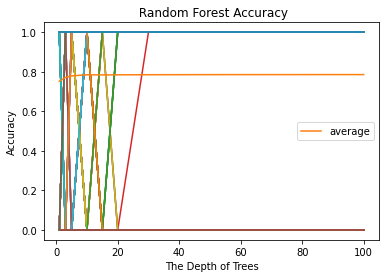

test accuracy = 0.8 with max_depth = 100


In [10]:
### 문제 3-2 ###
## 코드 작성 ##

import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

###### hyper-parameter : tree's max_depth ######

# 기존의 train, val dataset을 합친다. (X, y)
# train : 568 / test : 71
new_X = pd.concat([X_train,X_val])
new_y = pd.concat([y_train,y_val])

acc = [] # 각 fold의 parameter에 대한 accuracy
acc_mean = [] # 각 fold의 평균 accuracy
rst_acc = 0 # 최적의 parameter로 test set을 계산한 accuracy
rst_parameter = 0 # 최적의 parameter

# 최적의 parameter 찾기 위한 parameter 종류 : Tree Depth
randomDepth = [1, 3, 5, 10, 15, 20, 30, 50, 100]

# train 90%, test 10%로 dataset split
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.1, random_state=1004)


for i in randomDepth:
  # Random Forest Classifier 생성
  forest = RandomForestClassifier(max_depth=i, n_jobs=1, random_state=1004)

  # training
  forest.fit(X_train, y_train)

  #f = KFold(n_splits=5)
  loo = LeaveOneOut()

  accuracy = cross_val_score(forest, X_train, y_train, cv=loo, scoring='accuracy')
  acc.append(accuracy)
  acc_mean.append(np.mean(acc))

# 그래프 그리기
plt.plot(randomDepth, acc)
plt.plot(randomDepth, acc_mean, label='average')
plt.xlabel("The Depth of Trees")
plt.ylabel("Accuracy")
plt.title(" Random Forest Accuracy")
plt.legend()
plt.show()

# 최적의 parameter 찾기
tmp = max(acc_mean)
index = acc_mean.index(tmp)

# 최적의 parameter로 test dataset 계산하기
f_depth = randomDepth[index]
forest = RandomForestClassifier(max_depth=f_depth, n_jobs=1, random_state=1004)
forest.fit(X_train, y_train)
rst_acc = forest.score(X_test, y_test)

print('test accuracy =', rst_acc, 'with max_depth =',f_depth)


**설명 작성**  
- test accuracy:0.8
- 최적의 파라미터: max_depth = 100
- 설명:  
3-1과 동일한 방법으로 진행하지만, LOOCV는 n-fold이므로 cv값을 LeaveOneOut()으로 설정하고 n번 계산한다.  



---



## 문제4 Regression
문제 4 에서는 캘리포니아 주택 가격 데이터셋을 사용합니다.   
학습을 통해 주택 가격을 예측하는 문제입니다.  
데이터에 대한 자세한 설명은 아래 코드의 description을 참고해주세요.

In [19]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [20]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target

In [21]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [22]:
print(df.shape) #(20640, 9)
print(df.describe())

(20640, 9)
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308  

### 문제 4-1 : Pearson Correlation
- seaborn 패키지를 사용하여 pearson correlation heatmap을 그린다.
- heatmap을 확인한 후 각 feature들 간 어떠한 관계가 있는지 아래의 텍스트 셀에 서술한다.    
- target과 연관성이 높은 feature의 column들을 아래의 텍스트 셀에 기술한다.
- 기술한 columns들과 target column을 포함하여 DataFrame을 만들고 **이후 모든 문제에서는 이 DataFrame을 사용한다**.

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

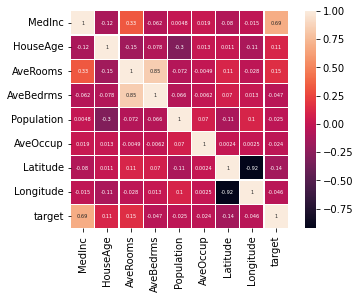

In [23]:
### 문제 4-1 ###
# correlation map 작성 후 plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats

heatmap_data = df

# 상관관계 분석
# correlationmap 작성
print(heatmap_data.corr())
# plot
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, linecolor = "white", annot = True, annot_kws = {"size" : 5})


- **Feature들 간 관계 서술**  
  답:  
- MedInc  
HouseAge : 약한 음적 선형관계  
AveRooms : 강한 양적 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
Population : 거의 무시될 수 있는 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 거의 무시될 수 있는 선형관계  
Longitude : 거의 무시될 수 있는 선형관계  
target : 뚜렷한 양적 선형관계  
  
- HouseAge  
MedInc : 약한 음적 선형관계  
AveRooms : 약한 음적 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
Population : 약한 음적 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 거의 무시될 수 있는 선형관계  
Longitude : 약한 음적 선형관계  
target : 약한 양적 선형관계  
  
- AveRooms  
MedInc  : 뚜렷한 양적 선형관계  
HouseAge : 약한 음적 선형관계  
AveBedrms : 강한 양적 선형관계  
Population : 거의 무시될 수 있는 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 약한 양적 선형관계  
Longitude : 거의 무시될 수 있는 선형관계  
target : 약한 양적 선형관계  
  
- AveBedrms  
MedInc  : 거의 무시될 수 있는 선형관계  
HouseAge : 거의 무시될 수 있는 선형관계  
AveRooms : 뚜렷한 양적 선형관계  
Population : 거의 무시될 수 있는 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 거의 무시될 수 있는 선형관계  
Longitude : 거의 무시될 수 있는 선형관계  
target : 거의 무시될 수 있는 선형관계  
  
- Population  
MedInc  : 거의 무시될 수 있는 선형관계  
HouseAge : 약한 음적 선형관계  
AveRooms : 거의 무시될 수 있는 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 약한 음적 선형관계  
Longitude : 거의 무시될 수 있는 선형관계  
target : 거의 무시될 수 있는 선형관계  
  
- AveOccup  
MedInc : 거의 무시될 수 있는 선형관계  
HouseAge : 거의 무시될 수 있는 선형관계  
AveRooms : 거의 무시될 수 있는 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
Population : 거의 무시될 수 있는 선형관계  
Latitude : 거의 무시될 수 있는 선형관계  
Longitude : 거의 무시될 수 있는 선형관계  
target : 거의 무시될 수 있는 선형관계  
   
- Latitude  
MedInc : 거의 무시될 수 있는 선형관계  
HouseAge : 거의 무시될 수 있는 선형관계  
AveRooms : 약한 양적 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
Population : 약한 음적 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Longitude : 뚜렷한 음적 선형관계  
target : 약한 음적 선형관계  
  
- Longitude  
MedInc : 거의 무시될 수 있는 선형관계  
HouseAge : 약한 음적 선형관계  
AveRooms : 거의 무시될 수 있는 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
Population : 거의 무시될 수 있는 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 뚜렷한 음적 선형관계  
target : 거의 무시될 수 있는 선형관계  
  
- target  
MedInc : 강한 양적 선형관계  
HouseAge : 약한 양적 선형관계  
AveRooms : 약한 양적 선형관계  
AveBedrms : 거의 무시될 수 있는 선형관계  
Population : 거의 무시될 수 있는 선형관계  
AveOccup : 거의 무시될 수 있는 선형관계  
Latitude : 약한 음적 선형관계  
Longitude : 거의 무시될 수 있는 선형관계  
  
- **최종 선택한 feature들**  
  답: MedInc, HouseAge, AveRooms, Latitude

In [24]:
### 문제 4-1 ###
# 새 dataframe 만들기
t_dataframe = heatmap_data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'target']] 

# t_dataframe.head(10)

                                             ### 문제 4-2: MSE, r2 score
- Scikit-learn 라이브러리의 LinearRegression 모델을 사용한다.
- train data는 test data를 제외한 **90%의 데이터를 사용**해야한다.
- **Mean Square Error(MSE)**와 **r2 score**를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.
- Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 텍스트 셀에 서술한다.

In [25]:
### 문제 4-2 ###
## 코드 작성 ##

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 전체 dataframe에서 X, y 분리
X = t_dataframe[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
y = t_dataframe[['target']] # Y true (origin value)

# train 90%, test 10% 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# print(X.shape, y.shape) 
# (20640, 4) (20640, 1)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# (18576, 4) (2064, 4) (18576, 1) (2064, 1)

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# train set의 predict
train_y_pred = model.predict(X_train) # 예측 값
mse_train = mean_squared_error(y_train, train_y_pred)
r2score = r2_score(y_train, train_y_pred)
print('train mse : ', mse_train,'r2_score : ', r2score)

# test set의 predict
test_y_pred = model.predict(X_test) # 예측 값
mse_test = mean_squared_error(y_test, test_y_pred)
r2score = r2_score(y_test, test_y_pred)
print('test mse  : ', mse_test,'r2_score : ', r2score)


train mse :  0.6346366519567632 r2_score :  0.5238469445641896
test mse  :  0.698857056792624 r2_score :  0.4704393270116135


**Prediction 결과를 바탕으로 학습한 LinearRegression 모델의 overfit, underfit 여부와 판단 근거를 서술**   
답:  
mse는 예측값과 실제 값의 오차의 제곱의 합을 나타낸다.
그러므로 mse 값이 크다는 것은 예측값과 실제값의 오차가 크다는 것이다.  
test mse의 값이 train mse값보다 크다면, test에서 오차가 더 많이 발생했다는 것이다.
따라서 train에서의 정확도보다 test에서의 정확도가 낮으므로 모델이 overfit(과적합)되었다는 것을 알 수 있다.

### 문제 4-3: Regularized Model
- Scikit-learn 라이브러리를 사용하여 Ridge Regression과 Lasso Regression 모델을 만든다.
- train : validation : test **데이터셋의 비율을 8:1:1**로 설정한다.
- 다양한 alpha 값에 대해 validation dataset을 사용하여 각 모델에 대한 **최적의 alpha 값을 찾고 찾은 최적의 alpha 값을 텍스트 셀에 작성**한다.
- alpha 값은 아래의 리스트를 사용한다.  
```alpha = [0.0001, 0.001,0.01,0.1,10]```
- alpha 값에 대한 R2 score의 변화를 그래프로 나타낸다.
  * **x축: alpha 값**
  * **y축: R2 score 값**
  * 파란색 선: Ridge 결과, 빨간색 선: Lasso 결과
  * 그래프에 **legend**가 포함되어 있어야 한다. 
- **train과 validation dataset을 합하여 train set을 만든 후 최종 학습 결과를 도출**한다.
  * 최적의 alpha 값을 찾을 때 사용한 test set은 변하지 않는다. 
  * r2 score를 사용하여 train set에 대한 prediction 결과와 test set에 대한 prediction 결과를 구해 print 한다.

In [26]:
### 문제 4-3 ###
## 코드 작성 ##

from sklearn.linear_model import Ridge, Lasso

# dataset 비율 설정 (( train 80%, vali 10%, test 10% ))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9)

# 사용하는 변수
alpha = [0.0001, 0.001, 0.01, 0.1, 10]
rdg_acc = []
rdg_acc_val = []
rdg_r2scores = []

lss_acc = []
lss_acc_val = []
lss_r2scores = []


# Ridge Regression (L2) 과 Lasso Regression (L1) 모델
# (1) Ridge Regression
for i in alpha:
  rdg = Ridge(alpha=i)
  rdg.fit(X_train, y_train)
  rdg_acc.append(rdg.score(X_train, y_train))
  rdg_acc_val.append(rdg.score(X_val, y_val))

  y_pred = rdg.predict(X_train)
  rdg_r2scores.append(r2_score(y_train, y_pred))

# (2) Lasso Regression
for i in alpha:
  lss = Lasso(alpha=i)
  lss.fit(X_train, y_train)
  lss_acc.append(lss.score(X_train, y_train))
  lss_acc_val.append(lss.score(X_val, y_val))

  y_pred = lss.predict(X_train)
  lss_r2scores.append(r2_score(y_train, y_pred))

# 최적의 alpha값 찾기
index = np.argmax(rdg_acc_val)
rdg_alpha = alpha[index]
index = np.argmax(lss_acc_val)
lss_alpha = alpha[index]

# 각 model의 최적의 alpha값
print(rdg_alpha)
print(lss_alpha)

0.0001
0.0001


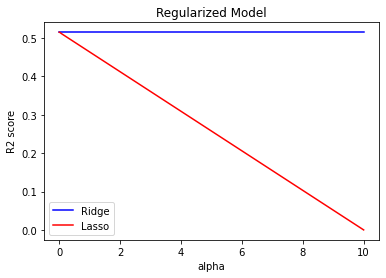

In [27]:
### 문제 4-3 ###
## 그래프 작성 ##
# Graph 그리기
plt.plot(alpha, rdg_r2scores, label='Ridge', color='b')
plt.plot(alpha, lss_r2scores, label='Lasso', color='r')
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("Regularized Model")
plt.legend()
plt.show()

- Rridge regression 모델 최적의 alpha 값:0.0001
- Lasso regression 모델 최적의 alpha 값:0.0001

In [29]:
### 문제 4-3 ###
# 최종 결과 출력

R2_score = []

# 1. train과 validation dataset 합치기
Xtrain = pd.concat([X_train, X_val])
ytrain = pd.concat([y_train, y_val])

# 2. 최적의 alpha값을 가지고 train과 test set에 대한 R2 score 구하기
# (1) Ridge Regression
rdg = Ridge(alpha=rdg_alpha)
rdg.fit(Xtrain, ytrain)
y_pred = rdg.predict(X_train)
R2_score.append(r2_score(y_train, y_pred))
y_pred = rdg.predict(X_test)
R2_score.append(r2_score(y_test, y_pred))

# (2) Lasso Regression
lss = Lasso(alpha=lss_alpha)
lss.fit(Xtrain, ytrain)
y_pred = lss.predict(X_train)
R2_score.append(r2_score(y_train, y_pred))
y_pred = lss.predict(X_test)
R2_score.append(r2_score(y_test, y_pred))

print('Ridge Regression train R2 : ',R2_score[0])
print('Ridge Regression test R2 : ',R2_score[1])
print('\nLasso Regression train R2 : ',R2_score[2])
print('Lasso Regression test R2 : ',R2_score[3])

Ridge Regression train R2 :  0.5150005023471207
Ridge Regression test R2 :  0.5408083172551584

Lasso Regression train R2 :  0.5150011221369453
Lasso Regression test R2 :  0.5408076999063157
